# Laboratorio #2
___

## Fashion MNIST

`Fashion-MNIST es un dataset de imágenes de artículos de ropa proporcionado por Zalando, creado como un reemplazo moderno del clásico MNIST de dígitos manuscritos. Está compuesto por 70,000 imágenes en escala de grises de 28×28 píxeles, divididas en 60,000 imágenes de entrenamiento y 10,000 de prueba. `

`Cada imagen está asociada con una etiqueta que indica el tipo de prenda, perteneciente a 10 clases:`
- **T-shirt/top** (Clase 0)
- **Trouser** (Clase 1)
- **Pullover** (Clase 2)
- **Dress** (Clase 3)
- **Coat** (Clase 4)
- **Sandal** (Clase 5)
- **Shirt** (Clase 6)
- **Sneaker** (Clase 7)
- **Bag** (Clase 8)
- **Ankle boot** (Clase 9)
___

### Librerias

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

___

### Importar de datos

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
print(f'Este data set esta conformado por {X_train.shape[0]} imagenes de {X_train.shape[1]}x{X_train.shape[2]} pixeles de datos de muestra.')
print(f'Los datos de entrenamiento suman {X_test.shape[0]} muestras de {X_test.shape[1]}x{X_test.shape[2]} pixeles igual que el entrenamiento.')
print(f'El target tiene {len(np.unique(y_train))} posibles valores de salida.')

Este data set esta conformado por 60000 imagenes de 28x28 pixeles de datos de muestra.
Los datos de entrenamiento suman 10000 muestras de 28x28 pixeles igual que el entrenamiento.
El target tiene 10 posibles valores de salida.


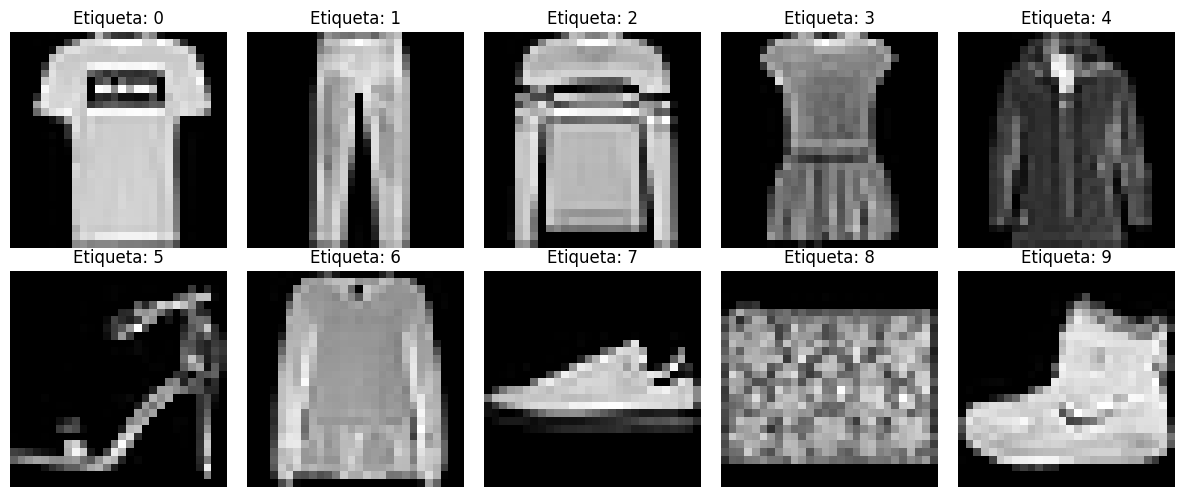

In [32]:
# Ejemplos de las imagenes

unique_labels = np.unique(y_train)  
examples = []

for label in unique_labels:
    idx = np.where(y_train == label)[0][0]  # primer índice donde aparece esa clase
    examples.append(idx)

# Graficamos
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.flatten()

for i, idx in enumerate(examples):
    # Si tus imágenes están aplanadas (784,) hay que remodelarlas a 28x28
    img = X_train[idx].reshape(28, 28)
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"Etiqueta: {y_train[idx]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


## Modelos
___

### Logistic regression

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [6]:
# Aplanar los datos a dos dimensiones

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat  = X_test.reshape(X_test.shape[0], -1)

print(f'Numero de dimensiones nueva del train: {X_train_flat.ndim}.')
print(f'Numero de dimensiones nueva del test: {X_test_flat.ndim}.')

Numero de dimensiones nueva del train: 2.
Numero de dimensiones nueva del test: 2.


In [7]:
# Escalar datos
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

In [ ]:
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=100, n_jobs=-1)
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)

c:\Users\Rafa\apps\5to semestre\MachineLearning\Proyecto1_ML\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Rafa\apps\5to semestre\MachineLearning\Proyecto1_ML\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
print("Accuracy de Logistic Regression:", accuracy_score(y_test, y_pred_lr))

Accuracy de Logistic Regression: 0.8455


In [ ]:
print("Reporte de Logistic Regression:\n", classification_report(y_test, y_pred_lr))

Reporte de Logistic Regression:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1000
           1       0.98      0.95      0.97      1000
           2       0.73      0.74      0.74      1000
           3       0.83      0.87      0.85      1000
           4       0.73      0.76      0.75      1000
           5       0.93      0.92      0.93      1000
           6       0.63      0.57      0.60      1000
           7       0.90      0.93      0.92      1000
           8       0.94      0.94      0.94      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.84      0.85      0.84     10000
weighted avg       0.84      0.85      0.84     10000



___

# SVM

In [11]:
from sklearn.svm import SVC

In [12]:
svc = SVC(
    C= 1.0, kernel= 'rbf', gamma='auto', max_iter= 10000,
    random_state= 19, 
    )

In [13]:
svc.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'auto'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [ ]:
y_pred_svc = svc.predict(X_test_scaled)

In [ ]:
print("Accuracy de SVC:", accuracy_score(y_test, y_pred_svc))

Accuracy de SVC: 0.8836


In [ ]:
print("Reporte de SVC:\n", classification_report(y_test, y_pred_svc))

Reporte de SVC:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.80      0.81      0.81      1000
           3       0.87      0.89      0.88      1000
           4       0.80      0.82      0.81      1000
           5       0.97      0.96      0.96      1000
           6       0.72      0.65      0.68      1000
           7       0.93      0.96      0.95      1000
           8       0.95      0.97      0.96      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



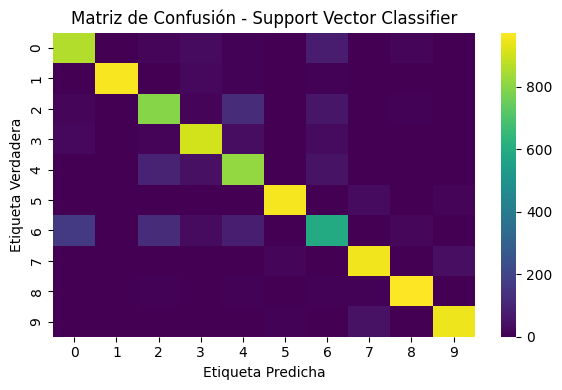

In [ ]:
confusion_mtx_svc = confusion_matrix(y_test, y_pred_svc)

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mtx_svc, cmap='viridis')
plt.title('Matriz de Confusión - Support Vector Classifier')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.tight_layout()
plt.show()    

___

# Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rfc = RandomForestClassifier(
    criterion= 'entropy', n_estimators=100, 
    random_state= 19 
)

In [20]:
rfc.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
y_pred_rf = rfc.predict(X_test_scaled)

In [ ]:
print("Accuracy de Random Forest:", accuracy_score(y_test, y_pred_rf))

Accuracy de Random Forest: 0.8762


In [ ]:
print("Reporte de Random Forest:\n", classification_report(y_test, y_pred_rf))

Reporte de Random Forest:
               precision    recall  f1-score   support

           0       0.81      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.76      0.80      0.78      1000
           3       0.88      0.91      0.89      1000
           4       0.77      0.81      0.79      1000
           5       0.98      0.96      0.97      1000
           6       0.73      0.59      0.65      1000
           7       0.93      0.95      0.94      1000
           8       0.95      0.97      0.96      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.87     10000
weighted avg       0.88      0.88      0.87     10000



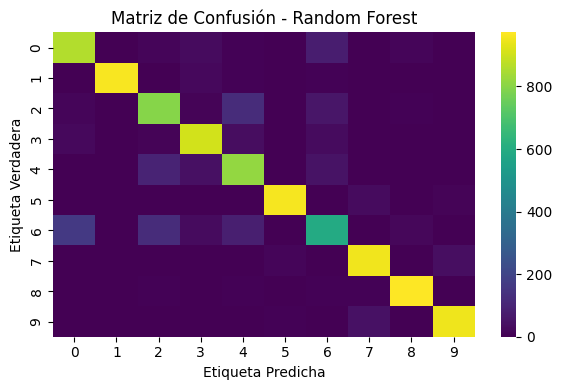

In [ ]:
confusion_mtx_rfc = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mtx_rfc, cmap='viridis')
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.tight_layout()
plt.show()    

___

# Neural Network (MLP)

In [40]:
from sklearn.neural_network import MLPClassifier

In [48]:
mlp = MLPClassifier(
    hidden_layer_sizes=(256, 128, 64),   
    activation='relu',               
    solver='adam',
    batch_size=256,
    learning_rate_init=1e-3,
    max_iter=50,                     
    early_stopping=True,             
    validation_fraction=0.1,
    n_iter_no_change=10,
    verbose=True,
    random_state=42
)

In [49]:
mlp.fit(X_train_scaled, y_train)

Iteration 1, loss = 0.47343050
Validation score: 0.861667
Iteration 2, loss = 0.32324941
Validation score: 0.872667
Iteration 3, loss = 0.28108556
Validation score: 0.883000
Iteration 4, loss = 0.25505065
Validation score: 0.874833
Iteration 5, loss = 0.22964376
Validation score: 0.877500
Iteration 6, loss = 0.20879487
Validation score: 0.884333
Iteration 7, loss = 0.19376685
Validation score: 0.879500
Iteration 8, loss = 0.17598052
Validation score: 0.889667
Iteration 9, loss = 0.16902264
Validation score: 0.884333
Iteration 10, loss = 0.14822893
Validation score: 0.891000
Iteration 11, loss = 0.13779744
Validation score: 0.884167
Iteration 12, loss = 0.12259372
Validation score: 0.885000
Iteration 13, loss = 0.12415075
Validation score: 0.890500
Iteration 14, loss = 0.11256547
Validation score: 0.889000
Iteration 15, loss = 0.10204382
Validation score: 0.889833
Iteration 16, loss = 0.09944921
Validation score: 0.888833
Iteration 17, loss = 0.08205323
Validation score: 0.882000
Iterat

,hidden_layer_sizes,"(256, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,256
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,50
,shuffle,True
,random_state,42


In [50]:
y_pred_mlp = mlp.predict(X_test_scaled)

In [51]:
print("Accuracy de MLP:", accuracy_score(y_test, y_pred_mlp))

Accuracy de MLP: 0.8848


In [52]:
print("Reporte de MLP:\n", classification_report(y_test, y_pred_mlp))

Reporte de MLP:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83      1000
           1       0.97      0.98      0.98      1000
           2       0.87      0.75      0.81      1000
           3       0.89      0.89      0.89      1000
           4       0.79      0.84      0.82      1000
           5       0.97      0.95      0.96      1000
           6       0.66      0.76      0.71      1000
           7       0.92      0.97      0.95      1000
           8       0.98      0.95      0.97      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.89     10000
weighted avg       0.89      0.88      0.89     10000



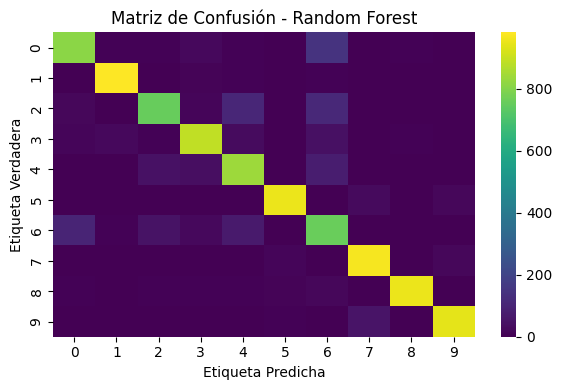

In [53]:
confusion_mtx_mlp = confusion_matrix(y_test, y_pred_mlp)

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mtx_mlp, cmap='viridis')
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.tight_layout()
plt.show()   

___
# Convolutional Neural Network (CNN)

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split

### Convolutional Neural Network architecture

In [26]:
cnn = keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)), # First Convolutional layer (32 features, 3x3 convloution window)
    layers.MaxPooling2D((2,2)), # 2x2 Filter Window 
    
    layers.Conv2D(64, (3, 3), activation="relu"), # Second Convolutional layer (64 features, 3x3 concolution window)
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation="relu"), # Third Convolutional Layer (64 features, 3x3 convolution window)
    
    layers.Flatten(), # Data gets flattened into 1 dimension
    
    layers.Dense(64, activation="relu"), # Fully connected layer with 64 neurons 
    layers.Dense(10, activation="softmax") # Output layer with 10 output neurons (1 for each class)
])

cnn.summary()

c:\Users\Rafa\apps\5to semestre\MachineLearning\Proyecto1_ML\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

He have a total of 93,322 parameters and a total 8 layers (including input and output)

In [27]:
cnn.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

X_train_cnn, X_val, y_train_cnn, y_val = train_test_split(X_train, y_train, stratify=y_train, random_state=11)

We create a validation set to constantly check the accuracy of the neural network

In [28]:
history = cnn.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), shuffle=True)

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.8004 - loss: 0.6842 - val_accuracy: 0.8390 - val_loss: 0.4362
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.8578 - loss: 0.3956 - val_accuracy: 0.8667 - val_loss: 0.3707
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.8720 - loss: 0.3548 - val_accuracy: 0.8845 - val_loss: 0.3161
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 16ms/step - accuracy: 0.8803 - loss: 0.3265 - val_accuracy: 0.8830 - val_loss: 0.3192
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8869 - loss: 0.3093 - val_accuracy: 0.8984 - val_loss: 0.2765
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.8905 - loss: 0.2944 - val_accuracy: 0.8995 - val_loss: 0.2737
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 28ms/step - accuracy: 0.8956 - loss: 0.2786 - val_accuracy: 0.9023 - val_loss: 0.2584
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9000 - 

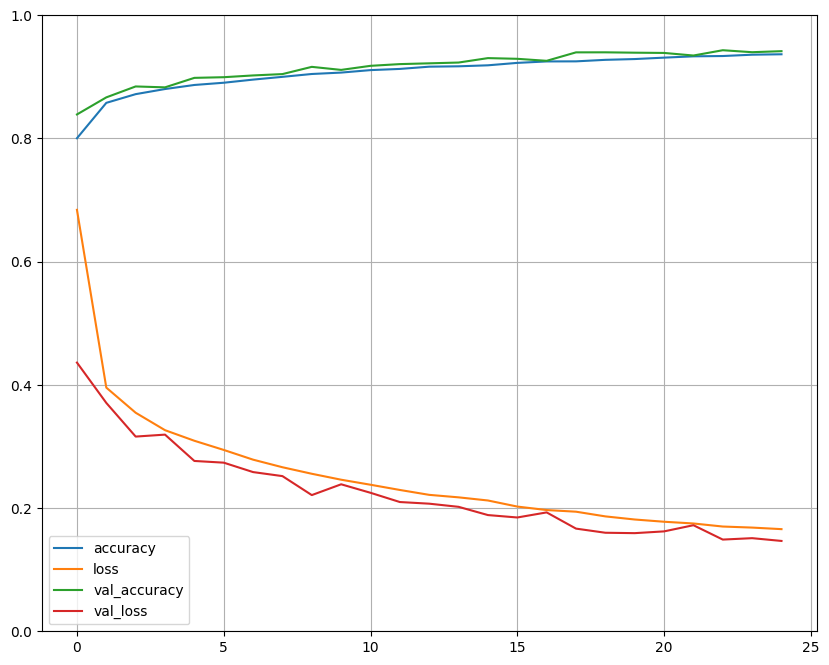

In [29]:
pd.DataFrame(history.history).plot(figsize=(10, 8))
plt.grid()
plt.gca().set_ylim(0,1)
plt.show()

In [30]:
y_pred_cnn = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [31]:
[(y_test[pred], np.argmax(y_pred_cnn[pred])) for pred in range(10)]

[(np.uint8(9), np.int64(9)),
 (np.uint8(2), np.int64(2)),
 (np.uint8(1), np.int64(1)),
 (np.uint8(1), np.int64(1)),
 (np.uint8(6), np.int64(6)),
 (np.uint8(1), np.int64(1)),
 (np.uint8(4), np.int64(4)),
 (np.uint8(6), np.int64(6)),
 (np.uint8(5), np.int64(5)),
 (np.uint8(7), np.int64(7))]